# Splitting Image into Header, Body and Footer

### **Importing** **Libraries**

In [ ]:
import os
import csv
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import cv2
import time
import warnings
from scipy import sparse
import scipy.stats as ss
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
import matplotlib
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import string
import warnings
warnings.filterwarnings("ignore")
from glob import glob
from tqdm import tqdm
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.initializers import RandomNormal
import PIL
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils
from keras.preprocessing import image
from sklearn.datasets import load_files
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
from keras.applications.vgg16 import decode_predictions
from keras import optimizers  
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.preprocessing import image
from sklearn.datasets import load_files
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.vgg16 import decode_predictions
from keras import optimizers
from tensorboardcolab import *
import tensorflow as tf
from tensorflow.keras import callbacks
from keras.layers import GlobalAveragePooling2D
import joblib
from keras.backend import set_session
from keras import backend as K
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


### Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Downloading the RVL-CDIP Dataset

In [ ]:
!curl 'https://doc-10-b4-docs.googleusercontent.com/docs/securesc/phje98qeour5bfeeutelm52umf19cam9/aud09ia921tmfl3vebur76gg2ds3guib/1573603200000/18137660436632322230/11262392864536255567/0Bz1dfcnrpXM-MUt4cHNzUEFXcmc?e=download&authuser=0&nonce=v4rpaid61ad12&user=11262392864536255567&hash=qep8ar5jj2lth0e1to1kceo0fl2r25dq' -H 'authority: doc-10-b4-docs.googleusercontent.com' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36' -H 'sec-fetch-user: ?1' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3' -H 'x-client-data: CIy2yQEIpbbJAQjEtskBCKmdygEI4qjKAQjLrsoBCM6wygEI5bHKAQj3tMoBGKukygE=' -H 'sec-fetch-site: cross-site' -H 'sec-fetch-mode: navigate' -H 'referer: https://docs.google.com/uc?id=0Bz1dfcnrpXM-MUt4cHNzUEFXcmc&export=download' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9,bn;q=0.8,hi;q=0.7' -H 'cookie: AUTH_iukl6tdo0kmcngldama5k5ht7dpich65_nonce=v4rpaid61ad12' --compressed -o "rvl-cdip.tar.gz" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 36.1G    0 36.1G    0     0  60.8M      0 --:--:--  0:10:07 --:--:-- 54.3M


### Uncompressing the tar.gz file

In [ ]:
import shutil
shutil.unpack_archive('/content/rvl-cdip.tar.gz')

Here we are Breaking the Images into 5 different Sub-categories like

    1.Header Images

    2.Footer Images

    3.Left Body Images
    
    4.Right Body images

    5.Whole Images (Header Images + Footer Images + Left Body Images + Right Body images)

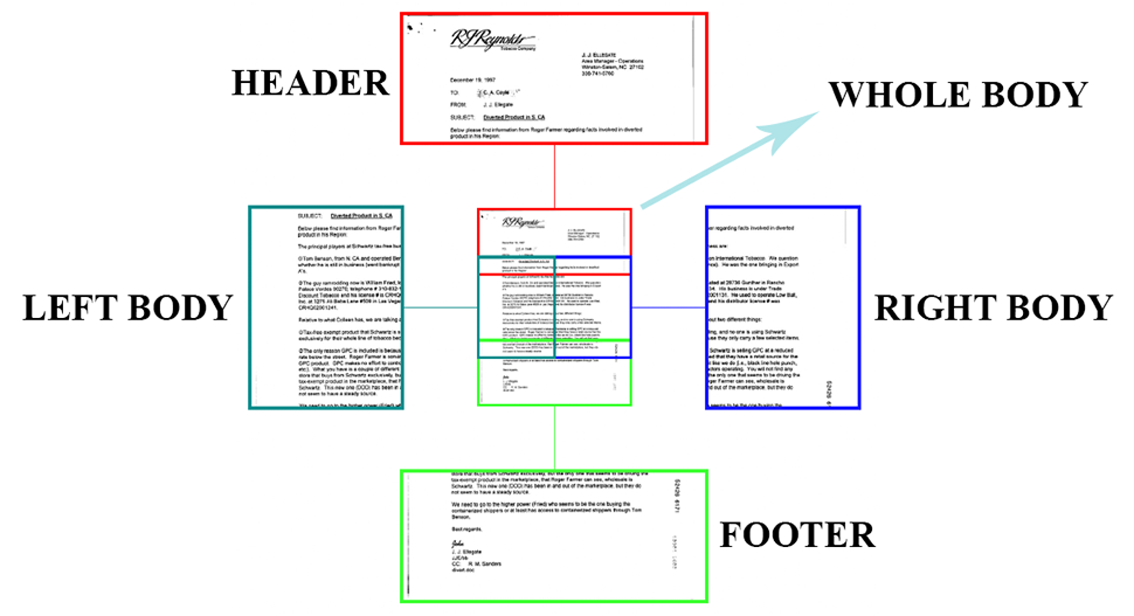

In [ ]:
from IPython.display import Image
Image("REGION_BASED_SPLITTING.png", width=800, height=600)

### Whole Image

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_whole = train_datagen.flow_from_directory('/content/DocumentImages/train', batch_size=32, target_size=(256,256))
test_whole = test_datagen.flow_from_directory('/content/DocumentImages/test', batch_size=32, target_size=(256,256))
valid_whole = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=32, target_size=(256,256))

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_whole.hdf5', save_best_only=True, monitor='acc', mode='max')

In [ ]:
model_whole = VGG16(weights = "imagenet", include_top = False, input_shape = (256, 256, 3))

In [ ]:
for layer in model_whole.layers:
    layer.trainable=True

x = model_whole.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

model_whole_final = Model(input = model_whole.input, output = predictions)
 
model_whole_final.compile(loss = "categorical_crossentropy", optimizer=Adam(lr=0.0001), metrics=["accuracy"])

model_whole_final.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
tbCallBack = callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
history = model_whole_final.fit_generator(train_whole, steps_per_epoch = 312000/128, epochs=10, validation_data=valid_whole, validation_steps=36800/128, callbacks=[reduce_lr, mcp_save, tbCallBack])

Epoch 1/10
2438/2437 [==============================] - 767s 315ms/step - loss: 1.1941 - acc: 0.6427 - val_loss: 0.7395 - val_acc: 0.7772

Epoch 2/10
2438/2437 [==============================] - 766s 314ms/step - loss: 0.7662 - acc: 0.4774 - val_loss: 0.6474 - val_acc: 0.5082
Epoch 3/10
2438/2437 [==============================] - 765s 314ms/step - loss: 0.6616 - acc: 0.5078 - val_loss: 0.5324 - val_acc: 0.5421
Epoch 4/10
2438/2437 [==============================] - 768s 315ms/step - loss: 0.6039 - acc: 0.5248 - val_loss: 0.5005 - val_acc: 0.5538
Epoch 5/10
2438/2437 [==============================] - 757s 311ms/step - loss: 0.5170 - acc: 0.5486 - val_loss: 0.4802 - val_acc: 0.5582
Epoch 6/10
2438/2437 [==============================] - 765s 314ms/step - loss: 0.5088 - acc: 0.5516 - val_loss: 0.4507 - val_acc: 0.5657
Epoch 7/10
2438/2437 [==============================] - 765s 314ms/step - loss: 0.4833 - acc: 0.5592 - val_loss: 0.4295 - val_acc: 0.5737
Epoch 8/10
2438/2437 [===========

In [ ]:
score = model_whole_final.evaluate_generator(test_whole,steps=36800/128,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
print("The Accuracy for the whole image model:",score[1]*100,"%")

The Accuracy for the whole image model: 57.61935763888889 %


### Header Image

In [ ]:
model_header = VGG16(weights = "imagenet", include_top=False, input_shape = (256, 256, 3))

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_header.hdf5', save_best_only=True, monitor='acc', mode='max')

In [ ]:
for layer in model_header.layers:
    layer.trainable=True

x = model_header.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

model_header_final = Model(input = model_header.input, output = predictions)

model_header_final.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [ ]:
model_header_final.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
model_header_final.load_weights('/content/drive/My Drive/model_whole.hdf5')

In [ ]:
def height_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:256,:,:]
        yield (batch_Xcrops,label)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_header = train_datagen.flow_from_directory('/content/DocumentImages/train',batch_size=32,target_size=(512,256))
test_header = test_datagen.flow_from_directory('/content/DocumentImages/test',batch_size=32,target_size=(512,256))
valid_header = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=32,target_size=(512,256))

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
tbCallBack = callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
history = model_header_final.fit_generator(height_crop_generator(train_header), steps_per_epoch =312000/256, epochs=10, validation_data=height_crop_generator(valid_header), validation_steps=36800/256, callbacks=[reduce_lr,mcp_save,tbCallBack])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




Epoch 1/10
1219/1218 [==============================] - 429s 352ms/step - loss: 0.8161 - acc: 0.7608 - val_loss: 0.6550 - val_acc: 0.8090

Epoch 2/10
1219/1218 [==============================] - 429s 352ms/step - loss: 0.6835 - acc: 0.6003 - val_loss: 0.5752 - val_acc: 0.6340
Epoch 3/10
1219/1218 [==============================] - 425s 349ms/step - loss: 0.6371 - acc: 0.6145 - val_loss: 0.5774 - val_acc: 0.6320
Epoch 4/10
1219/1218 [==============================] - 426s 349ms/step - loss: 0.6058 - acc: 0.6241 - val_loss: 0.5686 - val_acc: 0.6394
Epoch 5/10
1219/1218 [==============================] - 426s 349ms/step - loss: 0.5900 - acc: 0.6285 - val_loss: 0.4997 - val_acc: 0.6516
Epoch 6/10
1219/1218 [==============================] - 429s 352ms/step - loss: 0.5678 - acc: 0.6367 - val_loss: 0.5144 - val_acc: 0.6509
Epoch 7/10
1219/1218 [==============================] - 429s 352ms/step -

In [ ]:
score = model_header_final.evaluate_generator(height_crop_generator(test_header),steps=36800/256,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
print("The Accuracy for the header image model:",score[1]*100,"%")

The Accuracy for the header image model: 66.84895833333334 %


### Footer Image

In [ ]:
model_footer = VGG16(weights = "imagenet", include_top=False, input_shape = (256, 256, 3))

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_footer.hdf5', save_best_only=True, monitor='acc', mode='max')

In [ ]:
for layer in model_footer.layers:
    layer.trainable=True

x = model_footer.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

model_footer_final = Model(input = model_footer.input, output = predictions)

model_footer_final.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [ ]:
model_footer_final.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
model_footer_final.load_weights('/content/drive/My Drive/model_whole.hdf5')

In [ ]:
def bottom_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][-256:,:,:]
        yield (batch_Xcrops,label)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_footer = train_datagen.flow_from_directory('/content/DocumentImages/train',batch_size=32,target_size=(512,256))
test_footer = test_datagen.flow_from_directory('/content/DocumentImages/test',batch_size=32,target_size=(512,256))
valid_footer = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=32,target_size=(512,256))

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
tbCallBack = callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
history = model_footer_final.fit_generator(bottom_crop_generator(train_footer), steps_per_epoch =312000/256, epochs=10, validation_data=bottom_crop_generator(valid_footer), validation_steps=36800/256, callbacks=[reduce_lr,mcp_save,tbCallBack])

Epoch 1/10
1219/1218 [==============================] - 411s 337ms/step - loss: 0.9550 - acc: 0.5121 - val_loss: 0.7584 - val_acc: 0.5700
Epoch 2/10
1219/1218 [==============================] - 415s 341ms/step - loss: 0.7914 - acc: 0.5604 - val_loss: 0.7036 - val_acc: 0.5815
Epoch 3/10
1219/1218 [==============================] - 426s 349ms/step - loss: 0.7458 - acc: 0.5786 - val_loss: 0.6748 - val_acc: 0.5945
Epoch 4/10
1219/1218 [==============================] - 431s 353ms/step - loss: 0.7155 - acc: 0.5866 - val_loss: 0.6537 - val_acc: 0.5967
Epoch 5/10
1219/1218 [==============================] - 433s 355ms/step - loss: 0.7005 - acc: 0.5923 - val_loss: 0.6340 - val_acc: 0.5049
Epoch 6/10
1219/1218 [==============================] - 430s 353ms/step - loss: 0.6775 - acc: 0.5991 - val_loss: 0.6398 - val_acc: 0.5064
Epoch 7/10
1219/1218 [==============================] - 456s 374ms/step - loss: 0.6669 - acc: 0.5985 - val_loss: 0.6176 - val_acc: 0.5149
Epoch 8/10
1219/1218 [============

In [ ]:
score = model_footer_final.evaluate_generator(bottom_crop_generator(test_footer),steps=36800/128,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
print("The Accuracy for the footer image model:",score[1]*100,"%")

The Accuracy for the footer image model: 52.13975694444444 %


### Left Body Image

In [ ]:
model_left_body = VGG16(weights = "imagenet", include_top=False, input_shape = (256,256,3))

In [ ]:
for layer in model_left_body.layers:
    layer.trainable=True

x = model_left_body.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

model_left_body_final = Model(input = model_left_body.input, output = predictions)

model_left_body_final.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_left_body.hdf5', save_best_only=True, monitor='acc', mode='max')

In [ ]:
model_left_body_final.load_weights('/content/drive/My Drive/model_whole.hdf5')

In [ ]:
def left_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:,:256,:]
        yield (batch_Xcrops,label)

In [ ]:
#https://keras.io/preprocessing/image/
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_left_body = train_datagen.flow_from_directory('/content/DocumentImages/train',batch_size=32,target_size=(256,512))
test_left_body = test_datagen.flow_from_directory('/content/DocumentImages/test',batch_size=32,target_size=(256,512))
valid_left_body = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=32,target_size=(256,512))

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
history = model_left_body_final.fit_generator(left_crop_generator(train_left_body), steps_per_epoch =312000/256, epochs=10, validation_data=left_crop_generator(valid_left_body), validation_steps=36800/256, callbacks=[reduce_lr,mcp_save,tbCallBack])

Epoch 1/10
1219/1218 [==============================] - 415s 340ms/step - loss: 0.8189 - acc: 0.5586 - val_loss: 0.6619 - val_acc: 0.6079
Epoch 2/10
1219/1218 [==============================] - 426s 349ms/step - loss: 0.6667 - acc: 0.6056 - val_loss: 0.6199 - val_acc: 0.6199
Epoch 3/10
1219/1218 [==============================] - 433s 355ms/step - loss: 0.6299 - acc: 0.6176 - val_loss: 0.5821 - val_acc: 0.6325
Epoch 4/10
1219/1218 [==============================] - 442s 363ms/step - loss: 0.6319 - acc: 0.6170 - val_loss: 0.5620 - val_acc: 0.6364
Epoch 5/10
1219/1218 [==============================] - 437s 358ms/step - loss: 0.5877 - acc: 0.6298 - val_loss: 0.5035 - val_acc: 0.6533
Epoch 6/10
1219/1218 [==============================] - 436s 358ms/step - loss: 0.5749 - acc: 0.6352 - val_loss: 0.5447 - val_acc: 0.6392
Epoch 7/10
1219/1218 [==============================] - 435s 357ms/step - loss: 0.5597 - acc: 0.6381 - val_loss: 0.5221 - val_acc: 0.6424
Epoch 8/10
1219/1218 [============

In [ ]:
score = model_left_body_final.evaluate_generator(left_crop_generator(test_left_body),steps=36800/128,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
print("The Accuracy for the left body image model:",score[1]*100,"%")

The Accuracy for the left body image model: 67.00086805555556 %


### Right Body Image

In [ ]:
model_right_body = VGG16(weights = "imagenet", include_top=False, input_shape = (256,256,3))

In [ ]:
for layer in model_right_body.layers:
    layer.trainable=True

x = model_right_body.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

model_right_body_final = Model(input = model_right_body.input, output = predictions)

model_right_body_final.compile(loss = "categorical_crossentropy", optimizer =Adam(lr=0.0001), metrics=["accuracy"])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.000001)
mcp_save = ModelCheckpoint('model_right_body.hdf5', save_best_only=True, monitor='acc', mode='max')

In [ ]:
model_right_body_final.load_weights('/content/drive/My Drive/model_whole.hdf5')

In [ ]:
model_right_body_final.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
def right_crop_generator(batches):
    while True:
        batch_X, label = next(batches)
        batch_Xcrops = np.zeros((batch_X.shape[0],256,256,3))
        for i in range(batch_X.shape[0]):
            batch_Xcrops[i] = batch_X[i][:,-256:,:]
        yield (batch_Xcrops,label)

In [ ]:
#https://keras.io/preprocessing/image/
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_right_body = train_datagen.flow_from_directory('/content/DocumentImages/train',batch_size=32,target_size=(256,512))
test_right_body = test_datagen.flow_from_directory('/content/DocumentImages/test',batch_size=32,target_size=(256,512))
valid_right_body = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=32,target_size=(256,512))

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
history = model_right_body_final.fit_generator(right_crop_generator(train_right_body), steps_per_epoch =312000/256, epochs=10, validation_data=right_crop_generator(valid_right_body), validation_steps=36800/256, callbacks=[reduce_lr,mcp_save,tbCallBack])

Epoch 1/10
1219/1218 [==============================] - 414s 340ms/step - loss: 0.8891 - acc: 0.5305 - val_loss: 0.6971 - val_acc: 0.5906
Epoch 2/10
1219/1218 [==============================] - 424s 348ms/step - loss: 0.7244 - acc: 0.5807 - val_loss: 0.6168 - val_acc: 0.6155
Epoch 3/10
1219/1218 [==============================] - 429s 352ms/step - loss: 0.6769 - acc: 0.5985 - val_loss: 0.5938 - val_acc: 0.6194
Epoch 4/10
1219/1218 [==============================] - 433s 355ms/step - loss: 0.6480 - acc: 0.6053 - val_loss: 0.5995 - val_acc: 0.6160
Epoch 5/10
1219/1218 [==============================] - 431s 353ms/step - loss: 0.6317 - acc: 0.6132 - val_loss: 0.5513 - val_acc: 0.6331
Epoch 6/10
1219/1218 [==============================] - 436s 358ms/step - loss: 0.6165 - acc: 0.6156 - val_loss: 0.5531 - val_acc: 0.6314
Epoch 7/10
1219/1218 [==============================] - 451s 370ms/step - loss: 0.5851 - acc: 0.6232 - val_loss: 0.5451 - val_acc: 0.6381
Epoch 8/10
1219/1218 [============

In [ ]:
score = model_right_body_final.evaluate_generator(right_crop_generator(test_right_body),steps=36800/128,workers=2, use_multiprocessing=True, verbose=0)

In [ ]:
print("The Accuracy for the right body image model:",score[1]*100,"%")

The Accuracy for the right body image model: 65.17795138888889 %


### Loading, Dumping and Stacking the Data

In [ ]:
model_header_final.load_weights('/content/drive/My Drive/model_header.hdf5')
model_footer_final.load_weights('/content/drive/My Drive/model_footer.hdf5')
model_left_body_final.load_weights('/content/drive/My Drive/model_left_body.hdf5')
model_right_body_final.load_weights('/content/drive/My Drive/model_right_body.hdf5')

In [ ]:
train_header_footer = train_datagen.flow_from_directory('/content/DocumentImages/train',batch_size=1,target_size=(512,256),shuffle=False)
test_header_footer = test_datagen.flow_from_directory('/content/DocumentImages/test',batch_size=1,target_size=(512,256),shuffle=False)
valid_header_footer = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=1,target_size=(512,256),shuffle=False)

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
train_header_footer.reset()
test_header_footer.reset()
valid_header_footer.reset()

In [ ]:
feature_top = model_header_final.predict_generator(height_crop_generator(valid_header_footer),steps = 36800)

In [ ]:
train_header_footer.reset()
test_header_footer.reset()
valid_header_footer.reset()

In [ ]:
feature_bottom = model_footer_final.predict_generator(bottom_crop_generator(valid_header_footer),steps = 36800)

In [ ]:
train_header_footer.reset()
test_header_footer.reset()
valid_header_footer.reset()

In [ ]:
train_left_right = train_datagen.flow_from_directory('/content/DocumentImages/train',batch_size=1,target_size=(256,512),shuffle=False)
test_left_right = test_datagen.flow_from_directory('/content/DocumentImages/test',batch_size=1,target_size=(256,512),shuffle=False)
valid_left_right = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=1,target_size=(256,512),shuffle=False)

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
train_left_right.reset()
test_left_right.reset()
valid_left_right.reset()

In [ ]:
feature_left = model_left_body_final.predict_generator(left_crop_generator(valid_left_right),steps = 36800)

In [ ]:
train_left_right.reset()
test_left_right.reset()
valid_left_right.reset()

In [ ]:
feature_right = model_right_body_final.predict_generator(right_crop_generator(valid_left_right),steps = 36800)

In [ ]:
train_left_right.reset()
test_left_right.reset()
valid_left_right.reset()

In [ ]:
joblib.dump(feature_top,'top')
joblib.dump(feature_bottom,'bottom')
joblib.dump(feature_left,'left_body')
joblib.dump(feature_right,'right_body')

['right_body']

In [ ]:
train_total.reset()
test_total.reset()
valid_total.reset()

In [ ]:
train_total = train_datagen.flow_from_directory('/content/DocumentImages/train',batch_size=1,target_size=(256,256),shuffle=False)
test_total = test_datagen.flow_from_directory('/content/DocumentImages/test',batch_size=1,target_size=(256,256),shuffle=False)
valid_total = valid_datagen.flow_from_directory('/content/DocumentImages/valid', batch_size=1,target_size=(256,256),shuffle=False)

Found 312000 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.
Found 36800 images belonging to 16 classes.


In [ ]:
train_total.reset()
test_total.reset()
valid_total.reset()

In [ ]:
model_whole_final.load_weights('/content/drive/My Drive/model_whole.hdf5')

In [ ]:
train_total.reset()
test_total.reset()
valid_total.reset()

In [ ]:
holistic = model_whole_final.predict_generator(valid_total,steps = 36800)

In [ ]:
train_total.reset()
test_total.reset()
valid_total.reset()

In [ ]:
joblib.dump(holistic,'holistic')

['holistic']

In [ ]:
top = joblib.load('/content/top')
bottom = joblib.load('/content/bottom')
left_body = joblib.load('/content/left_body')
right_body = joblib.load('/content/right_body')
holistic = joblib.load('/content/holistic')

In [ ]:
total_features_valid = np.hstack((top, bottom, left_body, right_body, holistic))

In [ ]:
total_features_valid.shape

(36800, 80)

In [ ]:
train_total.reset()
test_total.reset()
valid_total.reset()

In [ ]:
holistic_test = model_whole_final.predict_generator(test_total,steps = 36800)

In [ ]:
train_total.reset()
test_total.reset()
valid_total.reset()

In [ ]:
test_header_footer.reset()

In [ ]:
top_test = model_header_final.predict_generator(height_crop_generator(test_header_footer),steps = 36800)

In [ ]:
test_header_footer.reset()

In [ ]:
bottom_test = model_footer_final.predict_generator(bottom_crop_generator(test_header_footer),steps = 36800)

In [ ]:
test_header_footer.reset()

In [ ]:
test_left_right.reset()

In [ ]:
left_test = model_left_body_final.predict_generator(left_crop_generator(test_left_right),steps = 36800)

In [ ]:
test_left_right.reset()

In [ ]:
right_test = model_right_body_final.predict_generator(right_crop_generator(test_left_right),steps = 36800)

In [ ]:
test_left_right.reset()

In [ ]:
joblib.dump(holistic_test,'holistic_test')
joblib.dump(top_test,'top_test')
joblib.dump(bottom_test,'bottom_test')
joblib.dump(left_test,'left_body_test')
joblib.dump(right_test,'right_body_test')

['right_body_test']

In [ ]:
header_test=joblib.load('/content/top_test')
footer_test=joblib.load('/content/bottom_test')
left_body_test=joblib.load('/content/left_body_test')
right_body_test=joblib.load('/content/right_body_test')
holistic_test=joblib.load('/content/holistic_test')

In [ ]:
total_features_test=np.hstack((header_test, footer_test, left_body_test, right_body_test, holistic_test))

In [ ]:
total_features_test.shape

(36800, 80)

In [ ]:
train_total.reset()

In [ ]:
holistic_train = model_whole_final.predict_generator(train_total,steps = 312000)
joblib.dump(holistic_train,'holistic_train')

['holistic_train']

In [ ]:
train_total.reset()
train_header_footer.reset()

In [ ]:
top_train = model_header_final.predict_generator(height_crop_generator(train_header_footer),steps = 312000)
joblib.dump(top_train,'top_train')

['top_train']

In [ ]:
train_header_footer.reset()

In [ ]:
bottom_train = model_footer_final.predict_generator(bottom_crop_generator(train_header_footer),steps = 312000)
joblib.dump(bottom_train,'bottom_train')

['bottom_train']

In [ ]:
train_header_footer.reset()
train_left_right.reset()

In [ ]:
left_body_train = model_left_body_final.predict_generator(left_crop_generator(train_left_right),steps = 312000)
joblib.dump(left_body_train,'left_train')

['left_train']

In [ ]:
train_left_right.reset()

In [ ]:
right_body_train = model_right_body_final.predict_generator(right_crop_generator(train_left_right),steps = 312000)
joblib.dump(right_body_train,'right_train')

['right_train']

In [ ]:
train_left_right.reset()

In [ ]:
holistic_train = model_whole_final.predict_generator(train_total,steps = 312000)
top_train = model_header_final.predict_generator(height_crop_generator(train_header_footer),steps = 312000)
bottom_train = model_footer_final.predict_generator(bottom_crop_generator(train_header_footer),steps = 312000)
left_body_train = model_left_body_final.predict_generator(left_crop_generator(train_left_right),steps = 312000)
right_body_train = model_right_body_final.predict_generator(right_crop_generator(train_left_right),steps = 312000)

In [ ]:
joblib.dump(holistic_train,'holistic_train')
joblib.dump(top_train,'top_train')
joblib.dump(bottom_train,'bottom_train')
joblib.dump(left_body_train,'left_train')
joblib.dump(right_body_train,'right_train')

In [ ]:
header_train = joblib.load('/content/top_train')
footer_train = joblib.load('/content/bottom_train')
left_body_train = joblib.load('/content/left_train')
right_body_train = joblib.load('/content/right_train')
holistic_train = joblib.load('/content/holistic_train')

In [ ]:
total_features_train = np.hstack((header_train, footer_train, left_body_train, right_body_train, holistic_train))

In [ ]:
total_features_train.shape

(312000, 80)

In [ ]:
train_labels=[]
for i in range(312000):
   batch=next(train_total)
   train_labels.append(batch[1])

In [ ]:
valid_labels=[]
for i in range(36800):
  batch=next(valid_total)
  valid_labels.append(batch[1])

In [ ]:
test_labels=[]
for i in range(36800):
   batch=next(test_total)
   test_labels.append(batch[1])

In [ ]:
joblib.dump(train_labels,'train_labels')
joblib.dump(valid_labels,'valid_labels')
joblib.dump(test_labels,'test_labels')

['test_labels']

In [ ]:
train_labels = joblib.load('/content/train_labels')
valid_labels = joblib.load('/content/valid_labels')
test_labels = joblib.load('/content/test_labels')

In [ ]:
### Final Model 

In [ ]:
final_model = Sequential()
final_model.add(Dense(512, activation='relu', input_shape=(total_features_valid.shape[1],)))
final_model.add(Dropout(0.50))
final_model.add(BatchNormalization())
final_model.add(Dense(256, activation='relu'))
final_model.add(Dropout(0.50))
final_model.add(Dense(16, activation='softmax'))

In [ ]:
tbCallBack = callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
final_model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history = final_model.fit(total_features_train, train_labels , validation_data= (total_features_valid, valid_labels), batch_size = 64, epochs = 10, verbose=1, callbacks=[mcp_save, tbCallBack])

Train on 312000 samples, validate on 36800 samples
Epoch 1/10
312000/312000 [==============================] - 26s 84us/step - loss: 0.3736 - acc: 0.6092 - val_loss: 0.3621 - val_acc: 0.6053
Epoch 2/10
312000/312000 [==============================] - 25s 80us/step - loss: 0.3015 - acc: 0.6928 - val_loss: 0.3471 - val_acc: 0.6056
Epoch 3/10
312000/312000 [==============================] - 25s 80us/step - loss: 0.2888 - acc: 0.7237 - val_loss: 0.3388 - val_acc: 0.6061
Epoch 4/10
312000/312000 [==============================] - 25s 80us/step - loss: 0.2812 - acc: 0.7244 - val_loss: 0.3355 - val_acc: 0.6090
Epoch 5/10
312000/312000 [==============================] - 25s 80us/step - loss: 0.2762 - acc: 0.7549 - val_loss: 0.3321 - val_acc: 0.6120
Epoch 6/10
312000/312000 [==============================] - 25s 80us/step - loss: 0.2722 - acc: 0.7751 - val_loss: 0.3323 - val_acc: 0.6166
Epoch 7/10
312000/312000 [==============================] - 26s 82us/step - loss: 0.2697 - acc: 0.8256 - val_

In [ ]:
score_test = final_model.evaluate(total_features_test, test_labels, batch_size=64)
print("Accuracy on the test data:",score_test[1]*100,'%')

36800/36800 [==============================] - 1s 23us/step
Accuracy on the test data: 61.7188043478261 %


### Testing the images

In [ ]:
classes = ("advertisement", "budget", "email", "file folder", "form", "handwritten", "invoice", "letter", "memo", "news article", "presentation", "questionnaire", "resume", "scientific publication", "scientific report", "specification")

In [ ]:
cmap = matplotlib.cm.get_cmap('gray')

def height_crop(path,type):
    image = cv2.imread(path)
    image = cv2.resize(image, (512, 256))
    if type =='bottom':
        image = image[-256:,:,:]
    else:
        image = image[:256,:,:]
    return image

def width_crop(path,type):
    image = cv2.imread(path)
    image = cv2.resize(image, (256, 512)) 
    if type == 'right':
        image = image[:,:256,:]
    else:
        image = image[:,-256:,:]
    return image

def full_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (256, 256))
    return image

def preprocess(image):
    image = image/255
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
img_path='0000176244.tif' 
img = image.load_img(img_path, target_size = (256, 256))
x = image.img_to_array(img)
x = np.expand_dims(img,axis=0)
x = preprocess(x)

top_pred=model_header.predict(x)
bottom_pred=model_footer.predict(x)
left_pred=model_left_body.predict(x)
right_pred=model_right_body.predict(x)
holistic_pred=model_whole.predict(x)
total_features=np.hstack((top_pred,bottom_pred,left_pred,right_pred,holistic_pred))
prediction=final_model.predict(total_features)

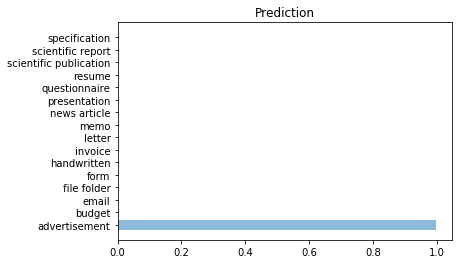

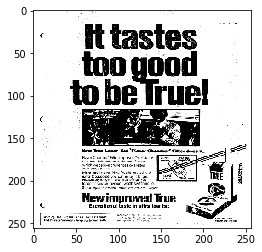

Predicted: [[9.9907327e-01 1.9776717e-05 2.0249520e-06 1.2867279e-04 6.7935318e-05
  6.3766885e-05 6.3295051e-06 1.6552991e-05 1.9140631e-05 2.6307214e-04
  4.5207056e-05 1.6421723e-04 9.8421024e-06 5.9455353e-05 4.5557317e-05
  1.5104232e-05]]


In [ ]:
#For plotting the probabilities

y_pos = np.arange(len(classes))
score = prediction
score_up = np.ravel(score)
plt.barh(y_pos, score_up, align='center', alpha=0.5)
plt.yticks(y_pos, classes)
plt.title('Prediction')
plt.show()
plt.imshow(img)
plt.show()
print('Predicted:', score)

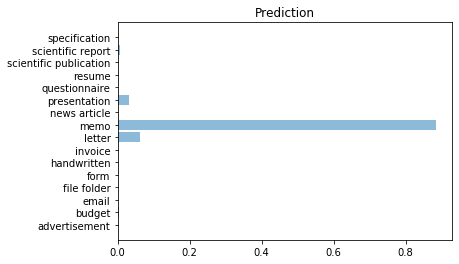

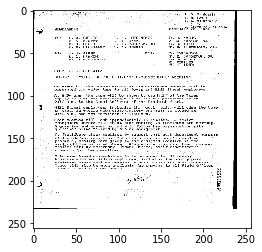

Predicted: [[8.1521028e-04 4.9587404e-03 1.5371690e-04 1.2334320e-03 1.7064442e-03
  6.7390800e-05 5.4901419e-04 6.1257679e-02 8.8570374e-01 1.8910767e-03
  3.0695038e-02 2.3587374e-03 1.0129750e-03 7.9793608e-05 7.0529990e-03
  4.6394055e-04]]


In [ ]:
#For plotting the probabilities

y_pos = np.arange(len(classes))
score = prediction
score_up = np.ravel(score)
plt.barh(y_pos, score_up, align='center', alpha=0.5)
plt.yticks(y_pos, classes)
plt.title('Prediction')
plt.show()
plt.imshow(img)
plt.show()
print('Predicted:', score)

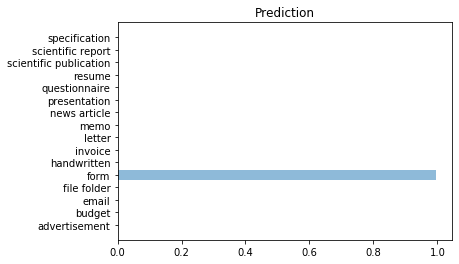

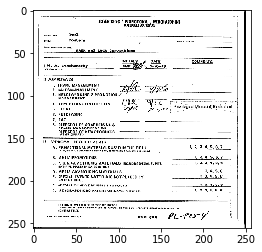

Predicted: [[5.2086009e-05 6.5495180e-05 3.0655590e-06 1.6898646e-05 9.9713111e-01
  4.6097877e-05 6.6983677e-04 2.4601378e-04 3.1958561e-04 6.7149808e-06
  1.5328365e-05 2.6096855e-04 9.3445287e-06 2.4760773e-06 7.4978423e-04
  4.0505306e-04]]


In [ ]:
#For plotting the probabilities

y_pos = np.arange(len(classes))
score = final_model.predict(total_features)
score_up = np.ravel(score)
plt.barh(y_pos, score_up, align='center', alpha=0.5)
plt.yticks(y_pos, classes)
plt.title('Prediction')
plt.show()
plt.imshow(img)
plt.show()
print('Predicted:', score)

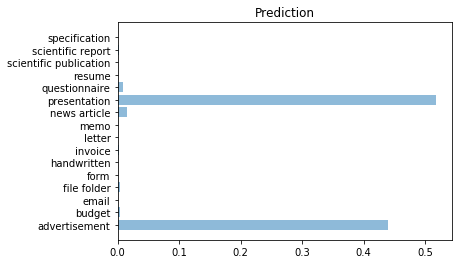

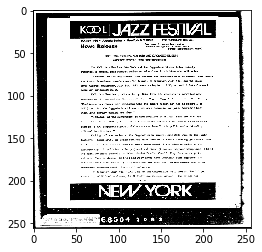

Predicted: [[4.3897784e-01 3.1364327e-03 9.6771670e-05 3.4926641e-03 1.3570576e-03
  1.0697749e-03 3.0701491e-03 9.6566317e-04 4.5748119e-04 1.4858071e-02
  5.1819396e-01 9.0237353e-03 1.4644145e-03 1.0137364e-03 2.1998514e-03
  6.2231440e-04]]


In [ ]:
#For plotting the probabilities

y_pos = np.arange(len(classes))
score = final_model.predict(total_features)
score_up = np.ravel(score)
plt.barh(y_pos, score_up, align='center', alpha=0.5)
plt.yticks(y_pos, classes)
plt.title('Prediction')
plt.show()
plt.imshow(img)
plt.show()
print('Predicted:', score)

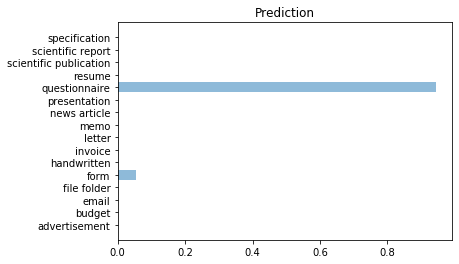

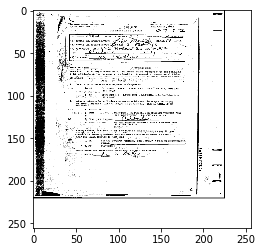

Predicted: [[1.00699166e-04 3.87446817e-05 1.77937329e-06 4.70001942e-05
  5.39738387e-02 3.34770826e-04 1.73669850e-05 4.02496953e-05
  2.99407566e-06 1.95080884e-06 9.31568211e-05 9.45190370e-01
  1.58458431e-06 5.17170565e-06 6.31634612e-05 8.70753356e-05]]


In [ ]:
#For plotting the probabilities

y_pos = np.arange(len(classes))
score = final_model.predict(total_features)
score_up = np.ravel(score)
plt.barh(y_pos, score_up, align='center', alpha=0.5)
plt.yticks(y_pos, classes)
plt.title('Prediction')
plt.show()
plt.imshow(img)
plt.show()
print('Predicted:', score)

### Conclusion

1.In this, we have to solve the Document Image Classification challenge. Here we took the RVL-CDIP Dataset.

2.Because the dataset is very big and needs GPU to computer so we use Google Colab for the free GPU. So, we download the data via curl and mounted the Colab Notebook with Google Drive.

3.After collecting the data we need to sort it because unlinke the other datasets RVL-CDIP dose not have different data from different folders. All the classes and the dats are jumble up. So we have to correctly separate the 16 classes.

4.The the next step is to read the data from the folders with help of labels (.txt files)

5.Now we will take the data and sort then inro Train, Test and Validation. The distribution is 312000 training images, 36800 testing images and 38600 validation images.

6.The next task is to break the Images into different regions like Whole, Footer, Header, Right Body, Left Body for the optimum accuracy.

7.For every region there will be train validation and test sets.

8.Then we will perform VGG16 Netork on every region separately. After doing this we will record the accuracies.

9.After that we will stack the features and save the models. One of the most important step is to reset the generators otherwise the result will be incorrect.

10.Then we will calculate train labels, test labels and validation labels respectively.

11.Finally we will calculate the final training, testing and validation accuracies for the final model.

12.Then we will check the model accuracy by taking a testing image and our model should be able to tell the class in which the image should belong. If we can classify the images correctly then we can say that our model is working properly.

Result: Splitting the images into Header, Footer, Left and Right body and training over VGG16 gives us an accuracy of 61.71%, as opposed to trainign the whole image which gives an accuracy of 57.61% giving us an effective boost of 4.10% in accuracy